<a href="https://colab.research.google.com/github/Koushikl0l/StockHound/blob/main/Demo2_StockHound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def create_time_series_dataset_pandas(df, target_col, time_step=1):
    y = df[target_col].values
    X_df = df.drop(columns=[target_col])
    #scaled_X_df = Scaling(X_df)
    X_array = X_df.values

    X_data, y_data = [], []

    for i in range(len(df) - time_step):
        feature_window = X_array[i:(i + time_step), :]
        X_data.append(feature_window)
        y_data.append(y[i + time_step-1])

    return np.array(X_data), np.array(y_data)

# def train_test_split(X, y, train_size=0.8):
#     split_index = int(len(X) * train_size)
#     X_train, X_test = X[:split_index], X[split_index:]
#     y_train, y_test = y[:split_index], y[split_index:]

#     return X_train, y_train, X_test, y_test

def train_test_validation_split(X, y, train_size=0.7, test_split=0.6):
    # Split the data into train and test based on the given train_size (70% for training)
    split_index_train = int(len(X) * train_size)
    X_train, X_test_val = X[:split_index_train], X[split_index_train:]
    y_train, y_test_val = y[:split_index_train], y[split_index_train:]

    # Further split the test data into test and validation (60% test, 40% validation)
    test_split_index = int(len(X_test_val) * test_split)
    X_test, X_val = X_test_val[:test_split_index], X_test_val[test_split_index:]
    y_test, y_val = y_test_val[:test_split_index], y_test_val[test_split_index:]

    return X_train, y_train, X_test, y_test, X_val, y_val


def Scaling(df):

      return pd.DataFrame(MinMaxScaler(feature_range=(0,1)).fit_transform(df),columns=df.columns)

def inverse_transform(data_scaled, min_original, max_original):

       # Inverse Min-Max scaling to return to the original scale
       return min_original + data_scaled * (max_original - min_original)


In [ ]:
# # Example usage
# dataset = {
#     'low': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#     'high': [15, 25, 35, 45, 55, 65, 75, 85, 95, 105],
#     'open': [12, 22, 32, 42, 52, 62, 72, 82, 92, 102],
#     'inflation': [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4],
#     'sentiment': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4],
#     'cpi': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
#     'close': [14, 24, 34, 44, 54, 64, 74, 84, 94, 104]
# }
# df = pd.DataFrame(dataset)

# X, y = create_time_series_dataset_pandas(df.iloc[0:7,:], target_col='close', time_step=3)
# X_train, y_train, X_test, y_test = train_test_split(X, y, train_size=0.8)
# print(df)
# print("Training Features (X_train):\n", X_train)
# print("Training Targets (y_train):", y_train)
# print("Testing Features (X_test):\n", X_test)
# print("Testing Targets (y_test):", y_test)

In [35]:
##read the original data
data = pd.read_csv('/content/drive/MyDrive/NEPSE/input_data.csv',index_col=0)
output_dir_path = '/content/drive/MyDrive/NEPSE/'
data['Date']=pd.to_datetime(data['Date']).dt.date
data.set_index("Date",inplace=True)
data.head()

,Open,High,Low,Close,Volume,MACD,RSI,ATR,MFI,CPI,USDX,IR,TB,EFFR,RMT,Score
Date,,,,,,,,,,,,,,,,
2016-07-17,1718.15,1749.96,1715.14,1745.74,2272045,-37.509420,74.940143,23.122890,70.196510,112.9,107.519,8.6,0.44,0.82,51.94,0.20955
2016-07-18,1745.74,1786.68,1745.74,1786.59,2870497,-41.071885,82.962838,24.395540,67.197424,112.9,107.519,8.6,0.44,0.82,51.94,0.21927
2016-07-19,1786.59,1813.42,1785.33,1800.47,2902127,-44.502170,84.862752,24.659430,65.486818,112.9,107.519,8.6,0.44,0.82,51.94,-0.02642
2016-07-20,1800.47,1813.44,1782.57,1786.84,3474801,-45.595275,75.342839,25.103042,55.037084,112.9,107.519,8.6,0.44,0.82,51.94,0.15107
2016-07-21,1786.84,1804.75,1779.71,1798.83,3154492,-46.888559,77.863404,25.098539,67.326060,112.9,107.519,8.6,0.44,0.82,51.94,0.12900


**Explanation of Key Concepts:**

Moving Average (MA):
The NEPSE close price and both the moving averages (20-day and 50-day) are plotted on the same graph to visualize how the moving averages interact with the actual stock price.


The moving averages help identify trends, with the shorter-term 20-day MA reacting more quickly to price changes compared to the 50-day MA, which shows broader market trends.

1.   MA_20: A 20-day simple moving average that smooths out short-term fluctuations in the data over a 20-day period.

2.   MA_50: A 50-day simple moving average that is used to understand longer-term trends in stock price data.

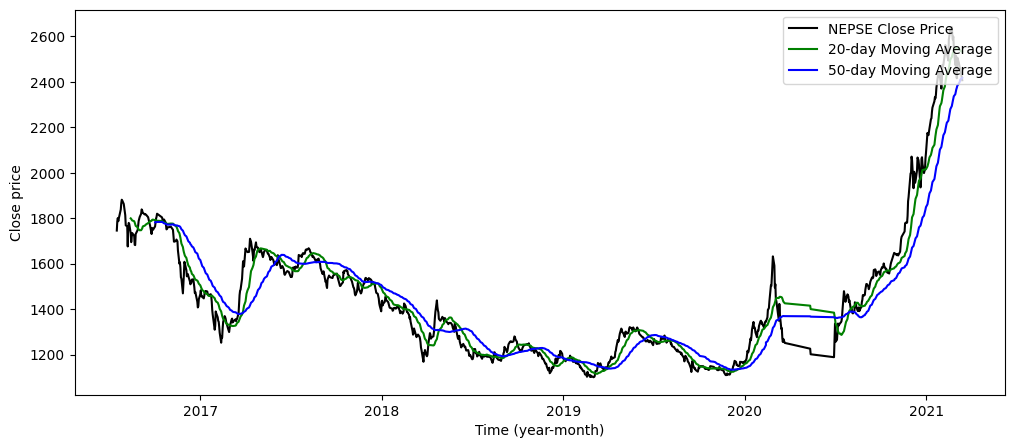

In [ ]:
df = data.copy()
#fig = plt.figure(figsize = (15,4))
df['MA_20'] = df['Close'].rolling(20).mean()
df['MA_50'] = df['Close'].rolling(50).mean()


fig = plt.figure(figsize=(12,5))
fig.set(facecolor = "white")
plt.plot(df['Close'], 'k',label=['NEPSE Close Price'])
plt.plot(df['MA_20'],'g', label=['20-day MA'])
plt.plot(df['MA_50'],'b', label=['50-day MA'])

plt.legend(['NEPSE Close Price', '20-day Moving Average', '50-day Moving Average'], loc='upper right')
plt.title('')
plt.xlabel('Time (year-month)')
plt.ylabel('Close price')

fig.savefig(output_dir_path+'original_data_plus_moving_averages.png',dpi=800)
plt.show()

In [36]:
Scaled_data = Scaling(data)
print(Scaled_data.iloc[0:7,:])
X, y = create_time_series_dataset_pandas(Scaled_data, target_col='Close', time_step=3)
X_train, y_train, X_test, y_test, X_val, y_val = train_test_validation_split(X, y)
print("Training Features (X_train):\n", X_train[0:7])
print("Training Targets (y_train):", y_train[0:7])
# print("Testing Features (X_test):\n", X_test)
# print("Testing Targets (y_test):", y_test)

       Open      High       Low     Close    Volume      MACD       RSI  \
0  0.394045  0.411250  0.405220  0.419000  0.087200  0.414759  0.745900   
1  0.411659  0.434650  0.425343  0.445530  0.110275  0.394676  0.831358   
2  0.437739  0.451690  0.451379  0.454545  0.111495  0.375338  0.851596   
3  0.446601  0.451703  0.449564  0.445693  0.133576  0.369176  0.750189   
4  0.437899  0.446165  0.447683  0.453480  0.121226  0.361885  0.777038   
5  0.445554  0.467730  0.460257  0.479237  0.182397  0.341350  0.843217   
6  0.470874  0.487159  0.485996  0.497428  0.226652  0.315911  0.874789   

        ATR       MFI       CPI      USDX   IR        TB     EFFR  RMT  \
0  0.264650  0.725950  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
1  0.286283  0.692080  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
2  0.290769  0.672762  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
3  0.298310  0.554749  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
4  0.298234  0.693533  0.0193

Open      1.566320e+03
High      1.569240e+03
Low       1.520630e+03
Close     1.539760e+03
Volume    2.593485e+07
MACD      1.773867e+02
RSI       9.387908e+01
ATR       5.882786e+01
MFI       8.854762e+01
CPI       2.579000e+01
USDX      1.935090e+01
IR        6.300000e+00
TB        5.690000e+00
EFFR      6.890000e+00
RMT       8.273300e+02
Score     7.281300e-01
dtype: float64


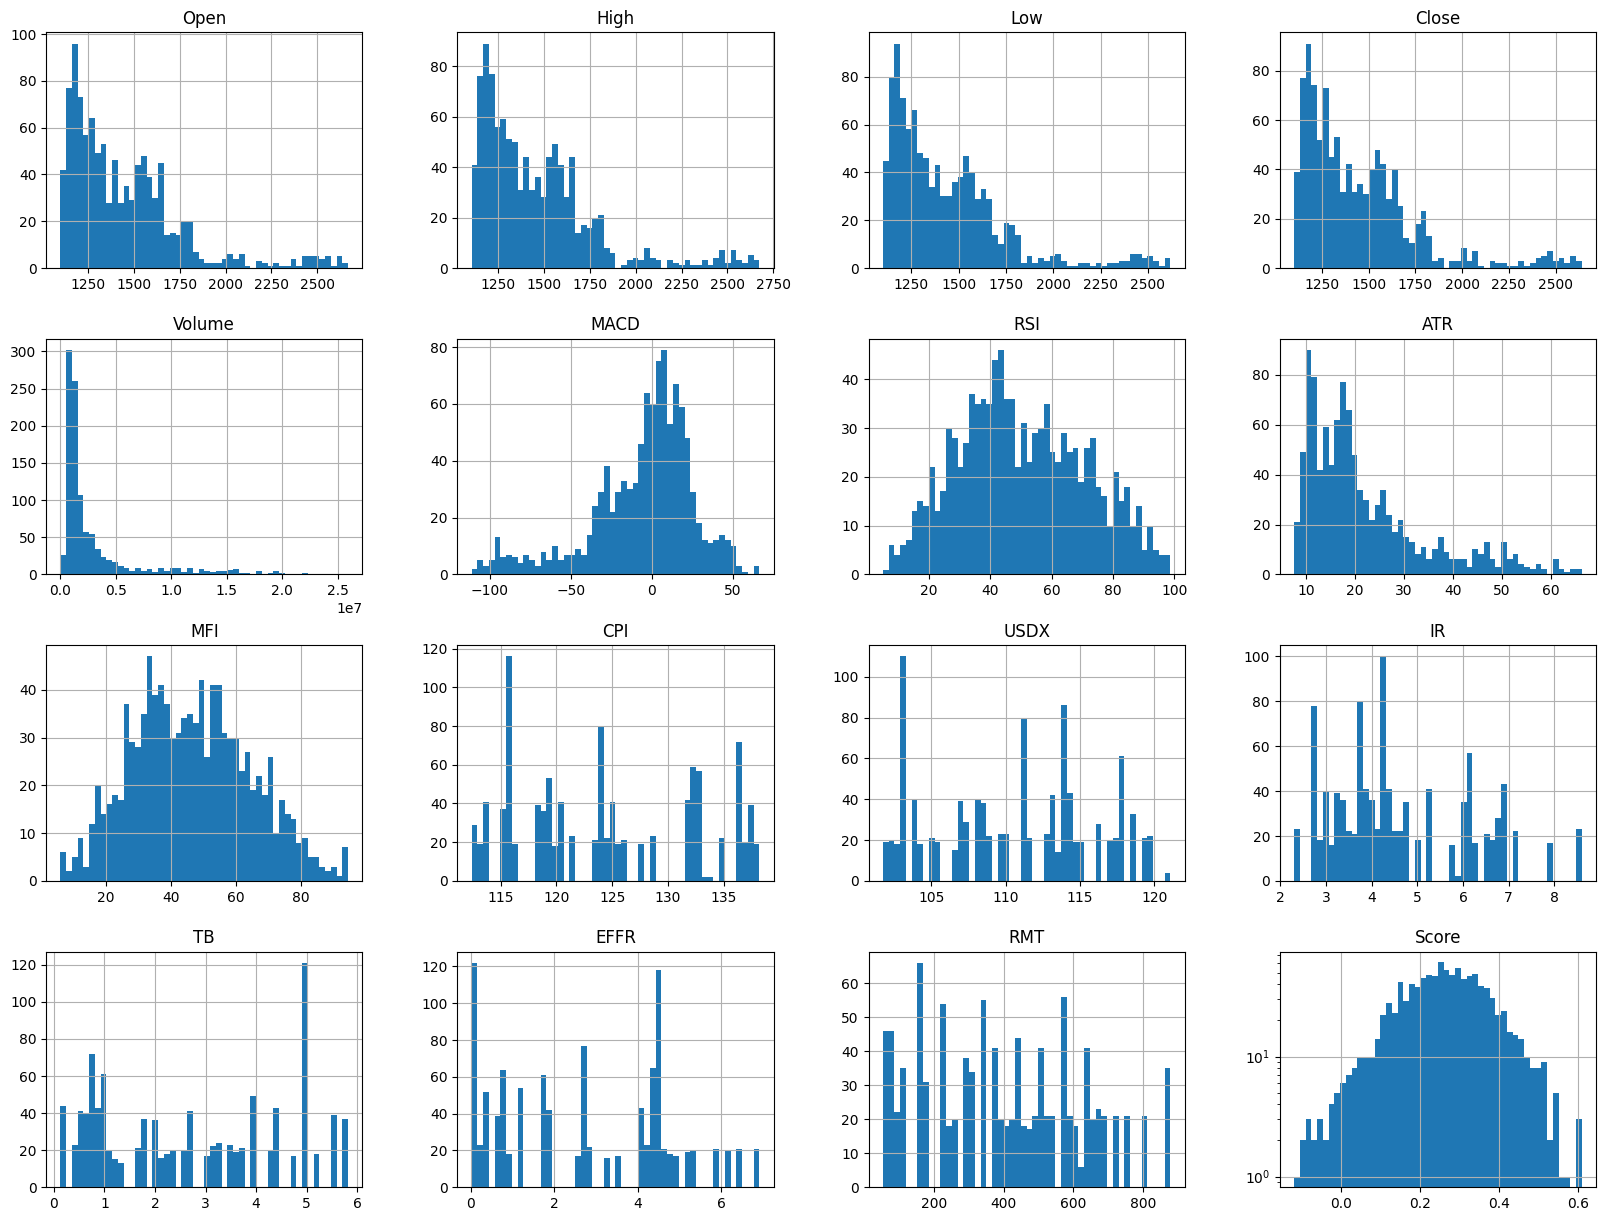

In [ ]:
import matplotlib.pyplot as plt
print(data.max() - data.min())
data.hist(bins=50, figsize=(20, 15))
plt.yscale('log')
plt.show()


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

def build_lstm_model(input_shape, lstm_units=70, dropout_rate=0.3, dense_units=50, output_units=1, learning_rate=0.001, loss='mse'):
    model = Sequential()

    # First LSTM layer with L2 regularization, dropout, and batch normalization
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=input_shape,
                   kernel_regularizer=l2(0.02)))
    model.add(BatchNormalization())  # Adding Batch Normalization
    model.add(Dropout(dropout_rate))  # Dropout for regularization

    # Second LSTM layer with L2 regularization, dropout, and batch normalization
    model.add(LSTM(units=lstm_units, return_sequences=False, kernel_regularizer=l2(0.02)))
    model.add(BatchNormalization())  # Adding Batch Normalization
    model.add(Dropout(dropout_rate))  # Dropout for regularization

    # Dense layer with L2 regularization
    model.add(Dense(units=dense_units, kernel_regularizer=l2(0.02)))
    model.add(BatchNormalization())  # Adding Batch Normalization
    model.add(Dropout(dropout_rate))  # Dropout for regularization

    # Output layer
    model.add(Dense(units=output_units))

    # Compile the model with Adam optimizer, customizable learning rate, and MAPE metric
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss,)  # Use MAPE as a metric

    return model

# Example usage:
# Assuming X_train has shape (num_samples, time_steps, num_features)
input_shape = (X_train.shape[1], X_train.shape[2])  # time_steps and num_features
model = build_lstm_model(input_shape, lstm_units=50, dropout_rate=0.3, dense_units=50, output_units=1, learning_rate=0.0006, loss='huber')

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 3, 50)               │          13,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 3, 50)               │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 3, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,601 (142.97 KB)

 Trainable params: 36,301 (141.80 KB)

 Non-trainable params: 300 (1.17 KB)

In [38]:
# # EarlyStopping to monitor validation loss and stop training if it starts to overfit
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# # Learning rate reduction on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# # Train the model (assuming you have already prepared your X_train, y_train, X_val, y_val)
# history = model.fit(X_train, y_train, epochs=70, batch_size=8, validation_data=(X_val, y_val), callbacks=[early_stopping,
#                                                                                                             #lr_scheduler
#                                                                                                             ])
# EarlyStopping to monitor validation loss and stop training if it starts to overfit
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model (assuming you have already prepared your X_train, y_train, X_val, y_val)
history = model.fit(X_train, y_train, epochs=70, batch_size=8, validation_data=(X_val, y_val), callbacks=[early_stopping,
                                                                                                          lr_scheduler])

Epoch 1/70
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 3.5618 - val_loss: 2.5752 - learning_rate: 6.0000e-04
Epoch 2/70
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6570 - val_loss: 2.0215 - learning_rate: 6.0000e-04
Epoch 3/70
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.1232 - val_loss: 1.6484 - learning_rate: 6.0000e-04
Epoch 4/70
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6875 - val_loss: 1.3471 - learning_rate: 6.0000e-04
Epoch 5/70
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3960 - val_loss: 1.1258 - learning_rate: 6.0000e-04
Epoch 6/70
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1630 - val_loss: 0.9587 - learning_rate: 6.0000e-04
Epoch 7/70
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9889 - val_loss: 0.8175 - learning_rate: 6.0000e-04
Epoch 8/70
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8698 - val_loss: 0.6807 - learning_rate: 6.0000e-04
Epoch 9/70
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7426 - val_loss: 0.6192 - learning_rate: 6.

In [154]:
## lstm_units=50, dropout_rate=0.3, dense_units=50, output_units=1, learning_rate=0.0006, loss='huber',batch = 8 Accuracy(R-squared): 0.88123

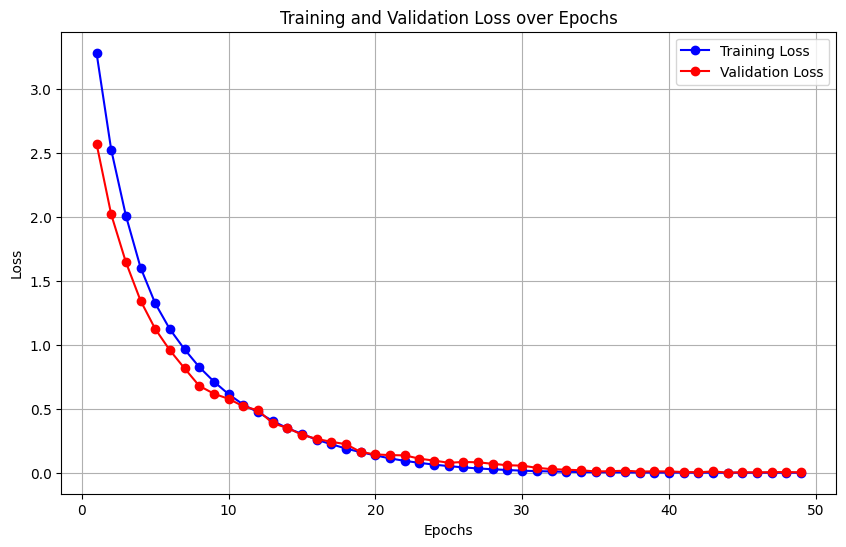

In [39]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by model.fit()
# It contains the training and validation loss history

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' means blue circle markers
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  # 'ro-' means red circle markers
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


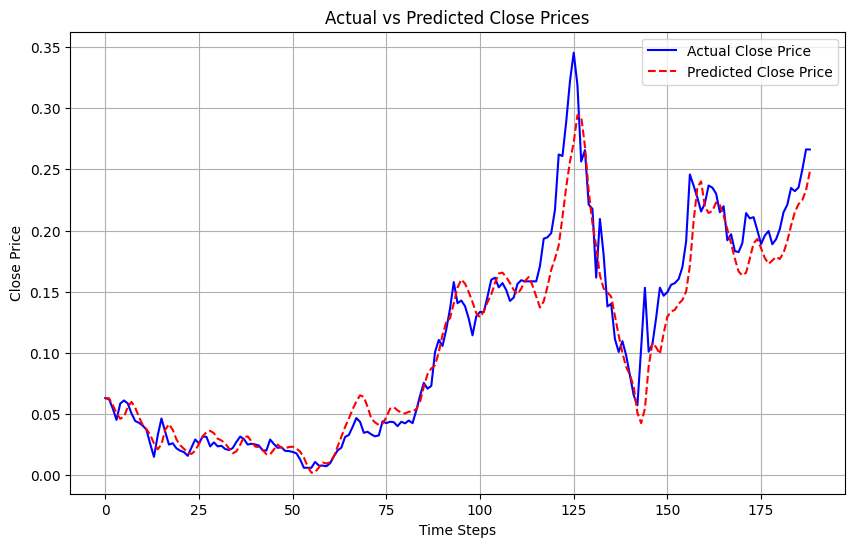

In [40]:
import matplotlib.pyplot as plt

# Assuming you have X_test, y_test (actual close prices) and the model is already trained
# Generate predictions for the test set
y_pred = model.predict(X_test)

# Flatten the y_test and y_pred arrays (in case they are multi-dimensional)
y_test = y_test.flatten()
y_pred = y_pred.flatten()

# Plot the actual close prices vs predicted close prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='red', linestyle='--')

plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
from sklearn.metrics import r2_score


# Compute R-squared
r2 = r2_score(y_test, y_pred)
print(f'Accuracy(R-squared): {r2}')


Accuracy(R-squared): 0.9348652706384541


In [ ]:
import itertools
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def hyperparameter_tuning(X_train, y_train, X_val, y_val, input_shape,
                          lstm_units_list=[50, 70], dropout_rates=[0.2, 0.3], dense_units_list=[50],
                          learning_rates=[0.001, 0.003], loss_functions=['mse', 'mae'],
                          batch_sizes=[8, 16], epochs=100):

    # Record results for each combination
    results = []

    # Generate all possible combinations of hyperparameters
    param_combinations = list(itertools.product(lstm_units_list, dropout_rates, dense_units_list, learning_rates, loss_functions, batch_sizes))

    for idx, (lstm_units, dropout_rate, dense_units, learning_rate, loss_function, batch_size) in enumerate(param_combinations):
        print(f"\nTraining Model {idx+1}/{len(param_combinations)} with Hyperparameters: ")
        print(f"LSTM Units: {lstm_units}, Dropout Rate: {dropout_rate}, Dense Units: {dense_units}, Learning Rate: {learning_rate}, Loss: {loss_function}, Batch Size: {batch_size}")

        # Build the LSTM model with the given hyperparameters
        model = build_lstm_model(input_shape=input_shape,
                                 lstm_units=lstm_units,
                                 dropout_rate=dropout_rate,
                                 dense_units=dense_units,
                                 learning_rate=learning_rate,
                                 loss=loss_function)

        # Callbacks for early stopping and learning rate reduction
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

        # Train the model
        history = model.fit(X_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(X_val, y_val),
                            callbacks=[early_stopping, lr_scheduler],
                            verbose=2)

        # Store the result for each hyperparameter set
        best_val_loss = min(history.history['val_loss'])
        results.append({
            'model': model,
            'lstm_units': lstm_units,
            'dropout_rate': dropout_rate,
            'dense_units': dense_units,
            'learning_rate': learning_rate,
            'loss_function': loss_function,
            'batch_size': batch_size,
            'best_val_loss': best_val_loss,
        })

    # Sort results based on the best validation loss and return the best model and hyperparameters
    best_result = sorted(results, key=lambda x: x['best_val_loss'])[0]
    print("\nBest Hyperparameters:")
    print(f"LSTM Units: {best_result['lstm_units']}, Dropout Rate: {best_result['dropout_rate']}, Dense Units: {best_result['dense_units']}, Learning Rate: {best_result['learning_rate']}, Loss: {best_result['loss_function']}, Batch Size: {best_result['batch_size']}")

    return best_result['model'], best_result

# Example usage with hyperparameters and data
# Assuming X_train, y_train, X_val, y_val are preprocessed and ready for use
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)

best_model, best_hyperparams = hyperparameter_tuning(X_train, y_train, X_val, y_val, input_shape,
                                                     lstm_units_list=[50, 75],
                                                     dropout_rates=[0.2, 0.3],
                                                     dense_units_list=[50, 75],
                                                     learning_rates=[0.0005, 0.0006],
                                                     loss_functions=['mse', 'huber'],
                                                     batch_sizes=[8, 16],
                                                     epochs=70)

# Print best model summary
best_model.summary()



Training Model 1/64 with Hyperparameters: 
LSTM Units: 50, Dropout Rate: 0.2, Dense Units: 50, Learning Rate: 0.0005, Loss: mse, Batch Size: 8
Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 6s - 65ms/step - loss: 1.3909 - val_loss: 0.4338 - learning_rate: 5.0000e-04
Epoch 2/70
92/92 - 1s - 8ms/step - loss: 0.9746 - val_loss: 0.3520 - learning_rate: 5.0000e-04
Epoch 3/70
92/92 - 1s - 10ms/step - loss: 0.7054 - val_loss: 0.3724 - learning_rate: 5.0000e-04
Epoch 4/70
92/92 - 1s - 15ms/step - loss: 0.6387 - val_loss: 0.3425 - learning_rate: 5.0000e-04
Epoch 5/70
92/92 - 1s - 11ms/step - loss: 0.5999 - val_loss: 0.3815 - learning_rate: 5.0000e-04
Epoch 6/70
92/92 - 1s - 11ms/step - loss: 0.6118 - val_loss: 0.3029 - learning_rate: 5.0000e-04
Epoch 7/70
92/92 - 1s - 7ms/step - loss: 0.5207 - val_loss: 0.3402 - learning_rate: 5.0000e-04
Epoch 8/70
92/92 - 1s - 13ms/step - loss: 0.5513 - val_loss: 0.3828 - learning_rate: 5.0000e-04
Epoch 9/70

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
92/92 - 1s - 7ms/step - loss: 0.4593 - val_loss: 0.3613 - learning_rate: 5.0000e-04

Training Model 2/64 with Hyperparameters: 
LSTM Units: 50, Dropout Rate:

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                       │ (None, 5, 50)               │          13,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_90               │ (None, 5, 50)               │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_90 (Dropout)                 │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_61 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_91               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_91 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_92               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_92 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,205 (426.59 KB)

 Trainable params: 36,301 (141.80 KB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 72,604 (283.61 KB)

In [ ]:
## The next idea is add attention layer to get better performance